In [1]:
%load_ext autoreload
%autoreload 2

In [27]:
from pymatgen.core.structure import Structure, Lattice
from pymatgen.analysis.graphs import StructureGraph
from pymatgen.analysis.local_env import CutOffDictNN
from torch_geometric.data import Data
import numpy as np
from omegaconf import OmegaConf
from mofgraph2vec.featurize.mof2doc import MOF2doc
import pandas as pd
from hydra.utils import instantiate
from gensim.models.doc2vec import Doc2Vec
from tqdm import tqdm

In [3]:
df_vector = pd.read_csv("../data/embedding_example/embedding-h50rl5oi.csv").set_index("type")

In [4]:
config = OmegaConf.load("../conf/config.yaml")
config.mof2vec_data = OmegaConf.load("../conf/mof2vec_data/data.yaml")
config.mof2vec_model = OmegaConf.load("../conf/mof2vec_model/gensim.yaml")

In [5]:
config.mof2vec_data.data.cif_path = ["../data/cifs/rsm/"]

In [6]:
config.mof2vec_data.data.subsample = 0.005
config.mof2vec_data.data.wl_step = 4

In [7]:
doc = instantiate(config.mof2vec_data.data, seed=config.seed)

In [20]:
documents = doc.get_documents()

100%|██████████| 16/16 [00:00<00:00, 285.70it/s]


In [ ]:
names = [d.tags[0] for d in documents]
word_length = [len(d.words) for d in documents]

In [ ]:
word_length_ordered = [l for _, l in sorted(zip(names, word_length))]

In [ ]:
vector_length = np.sum(df_vector**2, axis=1)

In [9]:
import matplotlib.pyplot as plt

In [ ]:
plt.scatter(word_length_ordered, vector_length)
plt.xlabel("MOF document length")
plt.ylabel("Embedded vector length")

In [ ]:
np.corrcoef(word_length_ordered, vector_length)

In [16]:
from mofgraph2vec.utils.saving import save_embedding
from hydra.utils import instantiate
from gensim.models.doc2vec import Doc2Vec

In [22]:
model = Doc2Vec(**config.mof2vec_model.gensim)
model.build_vocab(documents)

# Load embedding model

In [30]:
import matplotlib.pyplot as plt 
from scipy import stats

In [8]:
em_model = Doc2Vec.load("../experiments/workflow/wandb/offline-run-20230509_154052-ygb7sowe/tmp/embedding_model.pt")

In [50]:
em_model = Doc2Vec.load("../experiments/workflow/wandb/offline-run-20230511_222802-32gyt2yh/tmp/embedding_model.pt")

In [51]:
em_model.corpus_count

3257

In [52]:
df_rsm = pd.read_csv("../data/data.csv")

In [60]:
df_rsm

,Unnamed: 0,in,ASA [m^2/cm^3],CellV [A^3],Df,Di,Dif,NASA [m^2/cm^3],POAV [cm^3/g],POAVF,...,CH4HPSTP,CH4LPSTP,cif.label,KH_CH4_molkgpa,KH_N2_molkgpa,log_selectivity,info.decorated_graph_hash,info.undecorated_graph_hash,info.decorated_scaffold_hash,info.undecorated_scaffold_hash
0,3,8,2163.580,20019.00,7.83744,9.47418,9.45292,0.000000,1.074720,0.64186,...,294.894020,92.435013,RSM3975,1.168650e-05,4.160970e-06,0.449093,382517780dc5ab8eb8fa43295ce8bdf4,b49059acbd8c344ef658b5b181a142f5,25800f339ff3d43d2ddc5d1a59b4eeb4,08515bc3d51c5d80eafef0baa6e2b134
1,4,9,641.266,2633.04,4.14331,4.82084,4.80387,0.000000,0.136436,0.24024,...,122.892268,65.202487,RSM1828,1.770000e-08,7.416090e-08,NaN,a84c197bbfa5810808c44dc4ccfe11af,874ad4e1f85e1de8bd54bed65199e13a,b526ee2136f2d05af53b2bed85c5339d,b02ed13751c7be6d0f820f3e5f81b9b3
2,5,10,1603.800,15518.00,13.71867,18.80790,18.79960,0.888134,0.957188,0.64550,...,240.424018,75.790247,RSM4185,2.056460e-05,6.027810e-06,0.533550,45efa7c1e878af5ecbc618b706fc1136,bccd7095b8e6d26f8257ae674095d645,13cae2b9e4cfe2cfe9d05a9468ae4830,eb2900477384511abd851c626625231e
3,6,11,600.107,2602.59,4.06893,4.80529,4.80529,0.000000,0.133609,0.23884,...,121.218009,63.931260,RSM1824,3.899200e-06,1.174370e-06,0.522879,67abee315179d34012433698bf59a924,9fa41a3543983b720923f5ffb080b005,57a7b96939ec88db393126c63b0ed48d,0a8666fb6118b8149daf8d5e89321c93
4,10,15,498.734,2493.02,3.94356,4.70447,4.68752,0.000000,0.113502,0.21898,...,116.405076,63.089722,RSM1841,5.127200e-06,1.454260e-06,0.548749,3f69a0844ce43a2c27086353118d05ed,44a150af84481dfe02a60f89af03568c,8cd5110f581b241624b3544555208c56,9be47b63130f6c51d0ab9c1bf63e789e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3252,4610,9677,601.756,4479.64,4.08689,4.75984,4.75984,0.000000,0.163833,0.25402,...,188.408831,126.419233,RSM1618,2.490260e-05,3.365250e-06,0.868569,df97f8d55b270ccf87d6b5ef1d240b49,b9fbb38978dc92454d5f9dadc2d1f889,b7ce948b3839045aeca55c2b2b8c5831,04093fb5811c815186f3c99d9bf510d0
3253,4611,9679,1607.600,2134.77,7.69493,9.54888,9.54888,0.000000,0.661485,0.57334,...,259.054658,104.570872,RSM0984,1.156120e-05,3.589710e-06,0.509364,bcd37c930e2b58a516766833377a8c77,d7f19b4984eefc1dfe81e7e5d11a2c3c,3363bfcc7baaa3e433d11644fc5fa6ee,4cd3ef34cda4fc1a43dccccec19778b1
3254,4612,9681,416.131,1636.02,4.20115,4.73990,4.72096,0.000000,0.093092,0.16366,...,82.326216,71.472567,RSM1647,1.136910e-04,7.976930e-06,1.153723,f5a545a2d506d8424bfbbfd2917b9b9b,006d95bcc7ab668a21894bcb66e6b445,5a0a0630fef8a2bafe333d8fe4388354,ba67a8fe5b11dba57bc563a5d3b7a543
3255,4615,9685,0.000,2044.51,2.56035,4.18124,4.16282,35.643400,0.000000,0.00000,...,145.937629,90.328458,RSM1579,1.050080e-05,3.393710e-06,NaN,47335f2329fe60935ca636a63a0ebd48,70e36dc2a0dd36e20a761769501aa3f9,f0900a12ad6d994e6c6a490cedc50406,55501fe2ad68169f472605c0ab6f6cd2


In [71]:
similarities = []
task = "total_SA_volumetric"
delta_dg = []
for mof in tqdm(df_rsm["cif.label"]):
    sim_mof = em_model.dv.most_similar([mof])[0]
    similarities.append(sim_mof[1])
    delta_dg.append(np.abs(
        df_rsm[df_rsm["cif.label"]==mof][task].values - df_rsm[df_rsm["cif.label"]==sim_mof[0]][task].values
    )[0])
    

100%|██████████| 3257/3257 [00:06<00:00, 513.41it/s] 


In [72]:
res = stats.spearmanr(similarities, delta_dg)
res

SignificanceResult(statistic=-0.2274446754739588, pvalue=1.7473807408389753e-39)

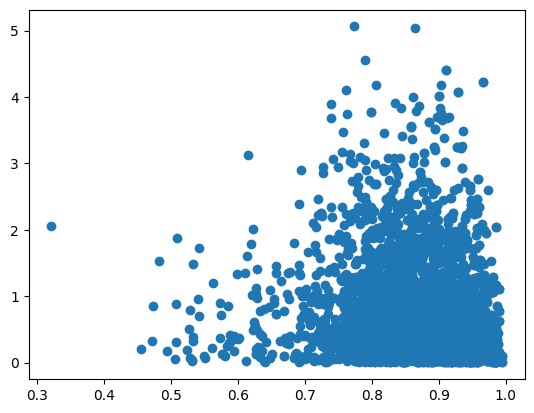

In [56]:
plt.scatter(similarities, delta_dg)

In [63]:
#spearman_coef = []
spearman_coef.append(res[0])

In [64]:
spearman_coef

[-0.13929336287118646, -0.12474714217929886]

In [9]:
import os
from moffragmentor import MOF

mof = MOF.from_cif("../data/cifs/rsm/RSM0001.cif")
fragments = mof.fragment()


In [27]:
from pymatgen.core import Structure

In [28]:
struc = Structure.from_file("../data/cifs/rsm/RSM0001.cif")

In [29]:
struc.composition

Comp: Gd1 H3 C3 O6